In [117]:
from PIL import Image
import re
from os import listdir, makedirs
from os.path import join
import pandas as pd

experiment_name = 'ram_variation_conv2d'
interest_variable = 'NR_RAMS'
path = 'dcma00_output'
files = [f for f in listdir(path) if f.endswith('.csv')]
#pattern_name = re.compile(r'parsed_cluster00_cfg_conv2d_CL(\d+)UN(\d+)LN(\d+)_log\.csv')
pattern_name = re.compile(r'parsed_dcma00_cfg_conv2d_NR(\d+)LS(\d+)AS(\d+)_log\.csv')
folder = f'output_data_{experiment_name}'
makedirs(folder, exist_ok=True)

df_tmp = {
  'NR_RAMS': [],
  'LINE_SIZE': [],
  'ASSOCIATIVITY': []
}
df = pd.DataFrame()

for f in files:
  check = pattern_name.findall(f)
  if len(check) == 1:
    clusters, units, lanes = check[0]
    df_tmp['NR_RAMS'].append(int(clusters))
    df_tmp['LINE_SIZE'].append(int(units))
    df_tmp['ASSOCIATIVITY'].append(int(lanes))

    file_path = join(path, f)
    df_buffer = pd.read_csv(file_path, index_col=0)
    df = pd.concat([df, df_buffer])

    df.reset_index(drop=True, inplace=True)
  
df2 = pd.DataFrame(df_tmp)
df = pd.concat([df2, df], axis=1)
df

,NR_RAMS,LINE_SIZE,ASSOCIATIVITY,total_energy,average_power,total_time,avg_bw_Gb,avg_bw_GB,avg_bw_idle_Gb,avg_bw_idle_GB,max_bw_Gb,max_bw_GB,simulation_time
0,16,1024,4,0.365610,411.90,0.887615,1.86,0.23,19.73,2.47,119.4,14.93,141.086
1,8,1024,4,0.371387,414.99,0.894920,1.98,0.25,19.64,2.46,119.4,14.93,565.687
2,4,1024,4,0.487455,443.05,1.100210,2.82,0.35,19.21,2.40,119.4,14.93,738.271
3,32,1024,4,0.371908,410.64,0.905657,1.82,0.23,20.05,2.51,119.4,14.93,386.463


In [119]:
df = df[df['LINE_SIZE'] == 1024]
df = df[df['ASSOCIATIVITY'] == 4]
df = df.sort_values(by=interest_variable)
df

,NR_RAMS,LINE_SIZE,ASSOCIATIVITY,total_energy,average_power,total_time,avg_bw_Gb,avg_bw_GB,avg_bw_idle_Gb,avg_bw_idle_GB,max_bw_Gb,max_bw_GB,simulation_time
2,4,1024,4,0.487455,443.05,1.100210,2.82,0.35,19.21,2.40,119.4,14.93,738.271
1,8,1024,4,0.371387,414.99,0.894920,1.98,0.25,19.64,2.46,119.4,14.93,565.687
0,16,1024,4,0.365610,411.90,0.887615,1.86,0.23,19.73,2.47,119.4,14.93,141.086
3,32,1024,4,0.371908,410.64,0.905657,1.82,0.23,20.05,2.51,119.4,14.93,386.463


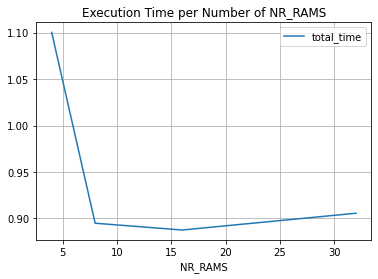

In [120]:
graph_name = 'total_time' + ".jpg"
df.plot(
  interest_variable, 'total_time', 
  grid=True,
  title=f'Execution Time per Number of {interest_variable}'
).get_figure().savefig(join(folder, graph_name))


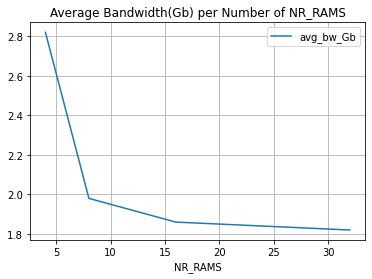

In [121]:
graph_name = 'avg_bw_Gb' + ".jpg"
df.plot(
  interest_variable, 'avg_bw_Gb', 
  grid=True,
  title=f'Average Bandwidth(Gb) per Number of {interest_variable}'
).get_figure().savefig(join(folder, graph_name))

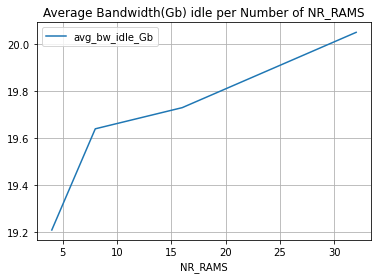

In [122]:
graph_name = 'avg_bw_idle_Gb' + ".jpg"
df.plot(
  interest_variable, 'avg_bw_idle_Gb', 
  grid=True,
  title=f'Average Bandwidth(Gb) idle per Number of {interest_variable}'
).get_figure().savefig(join(folder, graph_name))

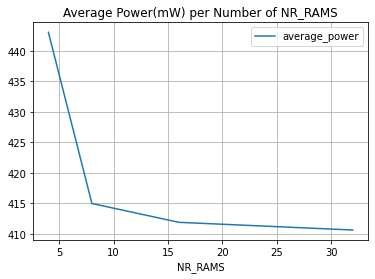

In [123]:
graph_name = 'average_power' + ".jpg"
df.plot(
  interest_variable, 'average_power', 
  grid=True,
  title=f'Average Power(mW) per Number of {interest_variable}'
).get_figure().savefig(join(folder, graph_name))

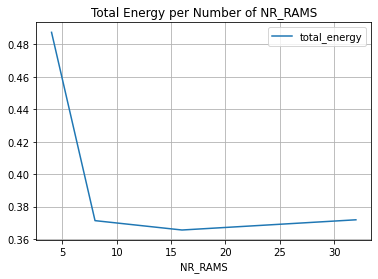

In [124]:
graph_name = 'total_energy' + ".jpg"
df.plot(
  interest_variable, 'total_energy', 
  grid=True,
  title=f'Total Energy per Number of {interest_variable}',
).get_figure().savefig(join(folder, graph_name))